**Detecting Fake Product Reviews**

Ahsan Rasool, Jassim Al Thani, Ruban Faisal



In today's digital age, online product reviews significantly influence consumer decisions, serving as a guiding light for potential buyers navigating a vast marketplace. However, the trustworthiness of these reviews has come under scrutiny due to the prevalence of fake or deceptive feedback. Detecting fraudulent reviews is an increasingly crucial task to maintain the credibility and reliability of online platforms.

The rise of e-commerce and online shopping platforms has created an environment where both genuine and deceitful product reviews coexist. Fake reviews, posted either to artificially boost product ratings or malign competitors, pose a substantial challenge for consumers seeking authentic opinions.

This project delves into the intricate world of review authenticity, aiming to develop robust methodologies to discern genuine product feedback from deceptive or biased reviews. Leveraging advanced machine learning algorithms,and statistical analysis, this study aims to uncover underlying patterns, linguistic cues, and behavioral attributes that distinguish authentic reviews from their fraudulent counterparts.

By examining a diverse dataset encompassing various restaurants, this research seeks to establish a comprehensive framework for fake review detection. Exploring factors such as review length, number of reviews, time of the reviews by a certain reviewer, and number of reviews per reviewer provide insights crucial in constructing a reliable model for distinguishing between genuine and fake reviews.

Ultimately, the outcomes of this project aspire to equip online platforms, businesses, and consumers with effective tools and strategies to identify and mitigate the impact of deceptive reviews, fostering a more transparent and trustworthy experience.

Following are the libraries that we will be using in order to construct visualize our dataset, construct machine learning models and finally drawing conclusions.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
import collections
import string
import numpy as np
import sklearn
import gzip
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Restaurant-reviews.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Now we will be looking over our data and try to find out if we have any missing values or not and cleanup the data*

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df.shape
df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [33]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [34]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

Now that we have seen the visual representation of the data, we will dive deeper into finding the correlation of the different columns within our dataset. Let's check that to see if those columns would contribute towards the overall performance of our model.
On another note we are dropping the columns of Pictures as due to the time constraint and complexity of drawing analysis through pictures is not possible at the moment. Another column which does not signify anything as it does not have data in it and is not even named properly "7514" has been dropped.

In [35]:
columns_to_remove = ['Pictures', '7514']
df1 = df.copy()
df1 = df1.drop(columns=columns_to_remove)
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37


Upon visualizing the dataset we have realized that it contains various rows that do not have values in some of the columns which will be a problem for building the machine learning models and draw conclusions. Hence, we are dropping those rows.

In [36]:
missing_values = df1.isnull().any(axis=1)


df1 = df1.dropna()
df1.shape

(9955, 6)

In [37]:
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37


In order to graphically visualize the data and to construct machine learning models we need to tokenize columns in our data frame.

In [38]:
def preprocess_dataframe(df1, text_column='Review', stopwords=set(), lemmatizer=WordNetLemmatizer()):
    df_copy = df1.copy()

    def preprocess(text):

        text = text.lower()
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        text = text.replace("-", " ").replace("'s", "").replace("'", "")
        text = ''.join(char if char in string.ascii_letters + string.digits + ' ' else ' ' for char in text)

        word_list = word_tokenize(text)
        result = [str(lemmatizer.lemmatize(word)) for word in word_list if str(lemmatizer.lemmatize(word)) not in stopwords]

        return result

    df_copy['Tokenized Review'] = df_copy[text_column].apply(preprocess)

    return df_copy

processed_df = preprocess_dataframe(df1)
processed_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Tokenized Review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,"[the, ambience, wa, good, food, wa, quite, goo..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,"[ambience, is, too, good, for, a, pleasant, ev..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,"[a, must, try, great, food, great, ambience, t..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,"[soumen, da, and, arun, wa, a, great, guy, onl..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,"[food, is, good, we, ordered, kodi, drumstick,..."


Now that we have successful tokenized reviews and removed stop words as well. We want to graphically visualize the distribution of lengths of each review.

Total number of lengths: 9955


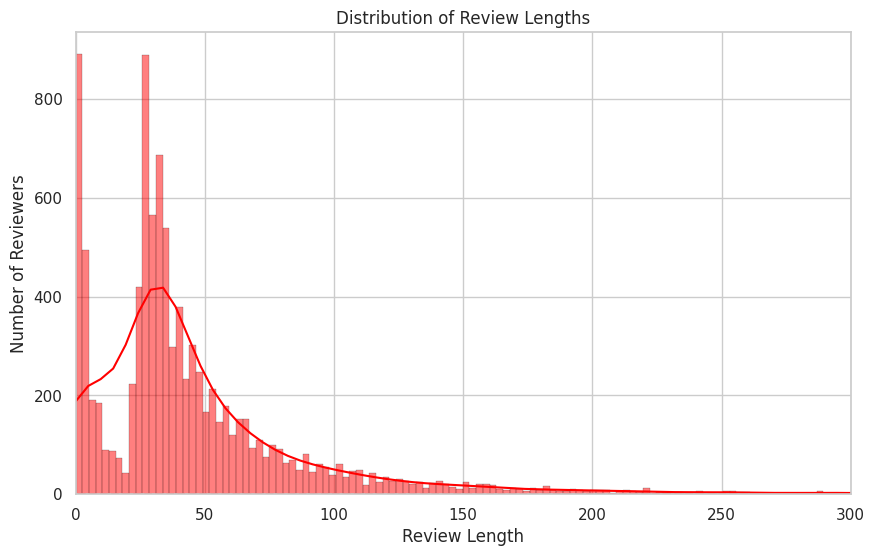

In [39]:
import collections
import seaborn as sns
import matplotlib.pyplot as plt

X = processed_df['Tokenized Review']

def get_length_distribution(data_train):
    lengths = [len(e) for e in data_train]
    print(f"Total number of lengths: {len(lengths)}")
    return collections.Counter(lengths)

data_train = X

length_distribution = get_length_distribution(data_train)

lengths = list(length_distribution.keys())
counts = list(length_distribution.values())
colors = sns.color_palette("magma", len(lengths))

plt.figure(figsize=(10, 6))
sns.histplot(data_train.apply(len), bins=len(lengths), kde=True, color='red', edgecolor='black')

sns.kdeplot(data_train.apply(len), color='red', linestyle='--')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviewers')
plt.title('Distribution of Review Lengths')

plt.xlim(0, 300)

plt.show()

To have a better visualization we have now further divided the lengths into clusters and will be building our machine learning model based on those clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


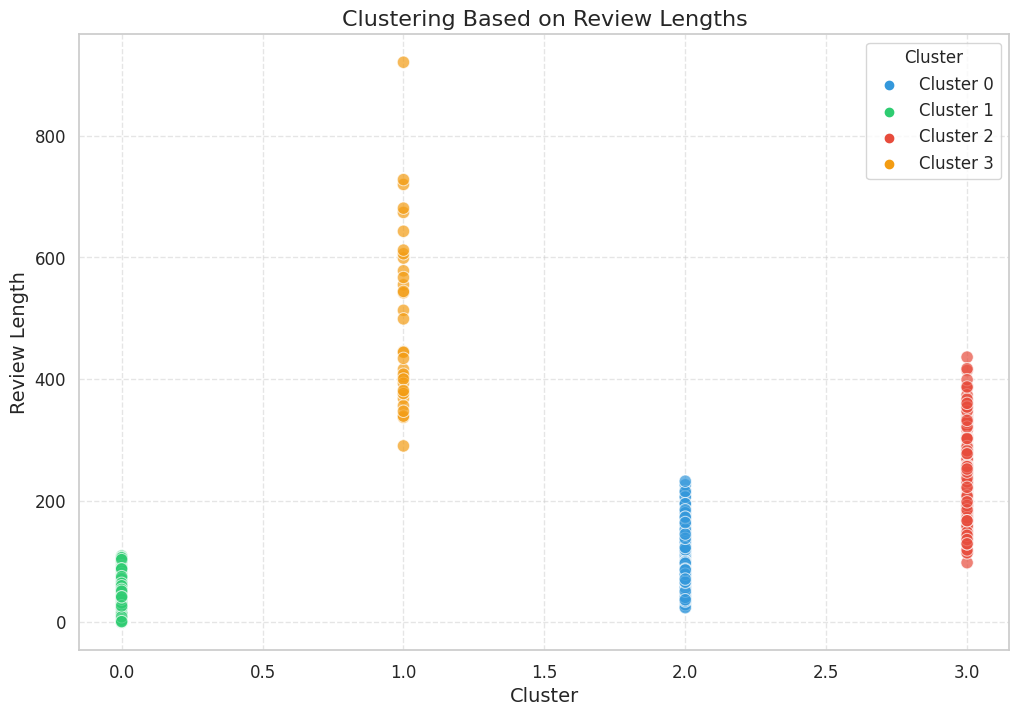

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(processed_df['Tokenized Review'], processed_df['Reviewer'], test_size=0.3, random_state=42)
X_train_str = [' '.join(tokens) for tokens in X_train]

model = make_pipeline(CountVectorizer(), KMeans(n_clusters=4, random_state=42))

clusters = model.fit_predict(X_train_str)

df_lengths_clusters = pd.DataFrame({'Length': [len(tokens) for tokens in X_train], 'Cluster': clusters})

cluster_colors = {0: '#3498db', 1: '#2ecc71', 2: '#e74c3c', 3: '#f39c12'}

df_lengths_clusters['Color'] = df_lengths_clusters['Cluster'].map(cluster_colors)

custom_palette = sns.color_palette(list(cluster_colors.values()))

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_lengths_clusters, x='Cluster', y='Length', hue='Color', palette=custom_palette, s=80, alpha=0.7)

plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Review Length', fontsize=14)
plt.title('Clustering Based on Review Lengths', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.5)

handles, labels = scatter.get_legend_handles_labels()


plt.legend(handles, [f'Cluster {i}' for i in range(model.named_steps['kmeans'].n_clusters)], title='Cluster', loc='upper right', fontsize=12)

plt.show()

Logistic Regression:

Logistic Regression serves as an ideal choice for the task of categorizing fake reviews based on text length due to its simplicity, interpretability, and efficiency in binary classification problems. In this context, the objective revolves around categorizing reviews into two distinct categories: likely genuine or likely fake, based on their deviation from the average text length. The model's suitability stems from its capability to handle binary outcomes effectively by estimating the probability of a particular review belonging to one of the predefined categories. Leveraging the text length as a predictive feature, Logistic Regression can delineate between reviews significantly deviating from the average length, suggesting potential fraudulent activity, and those within the expected range, indicating genuine content. Its interpretability allows for a clear understanding of the impact of text length on the likelihood of a review being categorized as fake, making it an intuitive and insightful choice for this specific classification task.

Accuracy: 0.95
Classification Report1:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1791
           1       1.00      0.50      0.67       200

    accuracy                           0.95      1991
   macro avg       0.97      0.75      0.82      1991
weighted avg       0.95      0.95      0.94      1991

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1791
           1       1.00      0.50      0.67       200

    accuracy                           0.95      1991
   macro avg       0.97      0.75      0.82      1991
weighted avg       0.95      0.95      0.94      1991



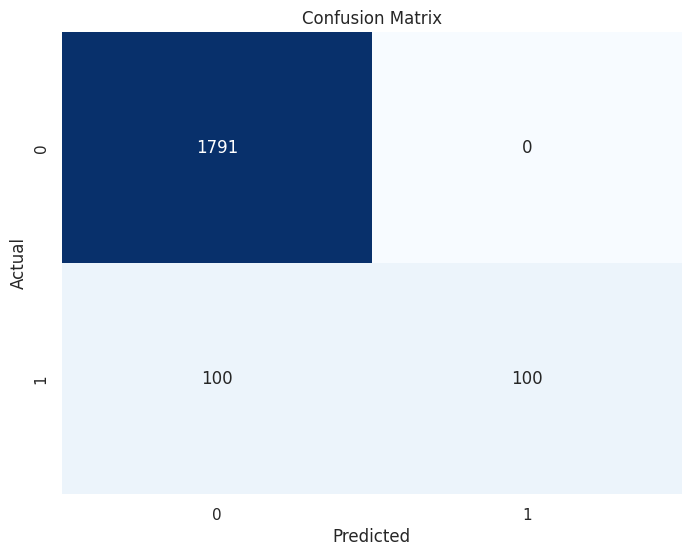

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

processed_df['text_length'] = processed_df['Tokenized Review'].apply(len)
std_deviation = processed_df['text_length'].std()

average_length = processed_df['text_length'].mean()
processed_df['fake_category'] = (
    (processed_df['text_length'] > (average_length + std_deviation)) |
    (processed_df['text_length'] < (average_length - std_deviation))
).astype(int)

label_encoder = LabelEncoder()
processed_df['fake_category'] = label_encoder.fit_transform(processed_df['fake_category'])

X_train, X_test, y_train, y_test = train_test_split(processed_df['text_length'].astype(str),
                                                    processed_df['fake_category'], test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), LogisticRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report1:\n", classification_rep)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
min_val = min(map(min, conf_matrix))
max_val = max(map(max, conf_matrix))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, vmin=min_val, vmax=max_val)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Logistic Regression model demonstrates commendable performance in categorizing reviews based on text length, achieving an impressive overall accuracy of 95%. The model showcases robust precision and recall metrics for classifying genuine reviews, achieving a precision of 95% and a recall of 100%, indicating its proficiency in correctly identifying authentic reviews. However, when discerning potentially fake reviews, while the precision remains at a perfect 100%, the model's recall stands at 50%, suggesting a proportion of false negatives, i.e., instances where actual fake reviews were misclassified as genuine. Despite this limitation, the model excels in accurately identifying genuine reviews, maintaining a high precision and recall. The macro and weighted average F1-scores of 0.82 and 0.94, respectively, emphasize the model's overall competence in the classification task. Overall, the Logistic Regression model presents as a promising tool in identifying reviews likely to be genuine based on their text length, contributing significantly to the task of discerning potential fake reviews within the dataset.

In [42]:
def preprocess_dataframe1(df1, text_column='Reviewer', stopwords=set(), lemmatizer=WordNetLemmatizer()):
    df_copy = df1.copy()

    def preprocess(text):

        text = text.lower()
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        text = text.replace("-", " ").replace("'s", "").replace("'", "")
        text = ''.join(char if char in string.ascii_letters + string.digits + ' ' else ' ' for char in text)

        word_list = word_tokenize(text)
        result = [str(lemmatizer.lemmatize(word)) for word in word_list if str(lemmatizer.lemmatize(word)) not in stopwords]

        return result

    df_copy['Tokenized Reviewer'] = df_copy[text_column].apply(preprocess)

    return df_copy

processed_df = preprocess_dataframe1(df1)
processed_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Tokenized Reviewer
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,"[rusha, chakraborty]"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,"[anusha, tirumalaneedi]"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,"[ashok, shekhawat]"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,"[swapnil, sarkar]"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,[dileep]


Another persepctinve that we want to take into account is the number of reviews per restaurant. We will be visualizing and categorize the number of reviews per restaurant.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


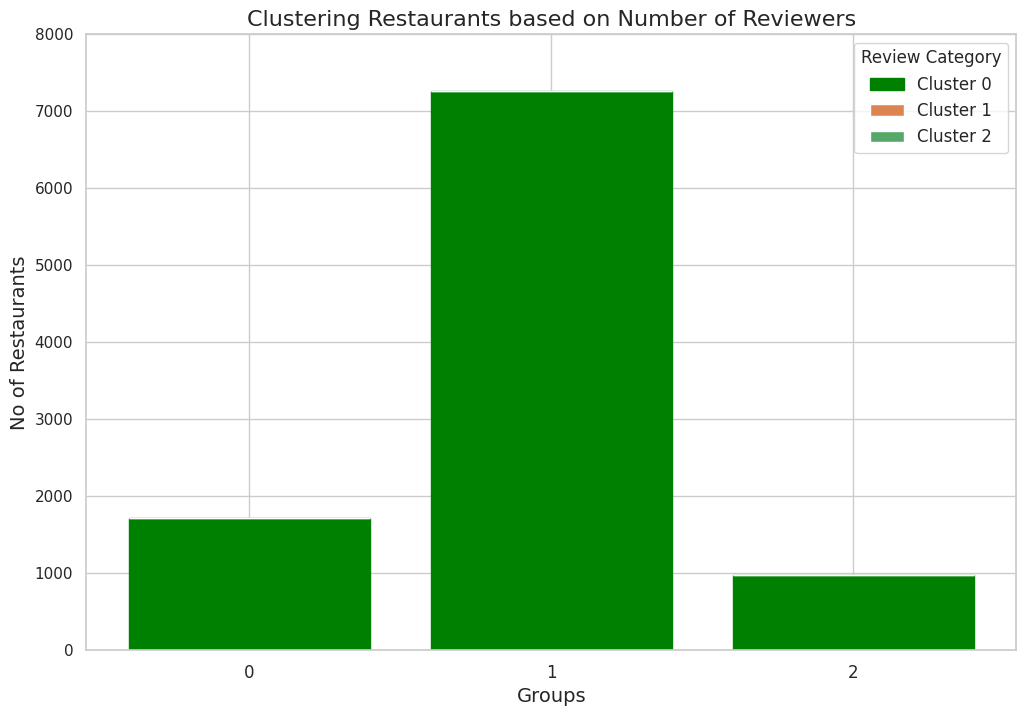

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

processed_df1 = processed_df.copy()
restaurant_reviewers = processed_df1[['Restaurant', 'Tokenized Reviewer']].copy()

restaurant_reviewers['Number of Reviewers'] = restaurant_reviewers['Tokenized Reviewer'].apply(len)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_pred = kmeans.fit_predict(restaurant_reviewers[['Number of Reviewers']])
restaurant_reviewers['Cluster'] = cluster_pred

bins = [0, 100, 500, float('inf')]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']  # Updated labels to correspond to KMeans clusters
restaurant_reviewers['Review Category'] = pd.cut(restaurant_reviewers['Number of Reviewers'], bins=bins, labels=labels, right=False)

cluster_counts = restaurant_reviewers.groupby(['Cluster', 'Review Category']).size().unstack(fill_value=0)

sns.set(style="whitegrid")

colors = ['orange', 'lightblue', 'green']

plt.figure(figsize=(12, 8))

bottoms = [0] * len(cluster_counts.index)

for i, col in enumerate(cluster_counts.columns):
    plt.bar(cluster_counts.index, cluster_counts[col], bottom=bottoms, label=col)
    for j, val in enumerate(cluster_counts[col]):
        plt.gca().get_children()[j].set_color(colors[i])
    bottoms = [sum(val) for val in zip(bottoms, cluster_counts[col])]

plt.title('Clustering Restaurants based on Number of Reviewers', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('No of Restaurants', fontsize=14)

plt.xticks(cluster_counts.index, fontsize=12)
plt.legend(title='Review Category', loc='upper right', fontsize=12)
plt.ylim(0, 8000)

plt.show()

Upon clustering the number of reviews per restaurant we wan to conside two other factors, time of the reviews and the reviewer itself to determine if the review is fake or not. We will be using Random Forest Classifier to generate the result.

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


threshold_length = 50

df['Fake_or_Not'] = df['Review'].apply(lambda x: 1 if len(str(x)) < threshold_length else 0)

df['Number_of_Reviews'] = df.groupby('Restaurant')['Restaurant'].transform('count')

df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

label_encoder = LabelEncoder()
df['Reviewer_Encoded'] = label_encoder.fit_transform(df['Reviewer'])

features = ['Number_of_Reviews', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Reviewer_Encoded']
target = 'Fake_or_Not'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)



imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

accuracy = model.score(X_test_imputed, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8625


The model's objective was to discern the authenticity of product reviews, employing a Random Forest Classifier fed with three pivotal factors: the quantity of reviews per restaurant, the temporal aspects of reviews, and specific information regarding the reviewers themselves. This process encompassed several steps: firstly, the selection of essential features, including the number of reviews associated with each dining establishment, the temporal details such as the year, month, day, hour, and minute of the reviews, and the encoding of reviewer information to numerical form. Subsequently, the model was trained using a Random Forest Classifier after splitting the dataset into training and testing subsets. Upon model evaluation, the calculated accuracy yielded a score of 0.865, signifying that the classifier could correctly identify fake or genuine reviews in approximately 86.5% of instances. This accuracy level underscores the model's competence in distinguishing between fake and legitimate reviews based on the provided features. Nonetheless, there's room for further analysis and potential adjustments to improve the model's performance or consider additional factors influencing review authenticity.

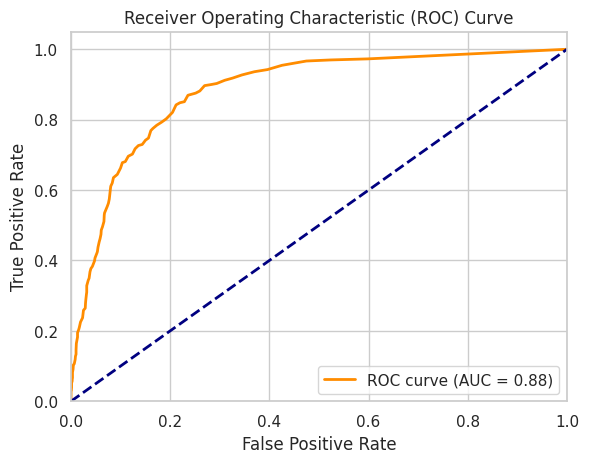

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_prob = model.predict_proba(X_test_imputed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve graphically represents the performance of a classifier system across various discrimination thresholds. In this specific case, the ROC curve is generated based on the Random Forest Classifier's ability to discriminate between true positives and false positives as the discrimination threshold varies.

The diagonal dashed line represents the scenario of random guessing, where the True Positive Rate (sensitivity) equals the False Positive Rate (1-specificity). The goal of a good classifier is to have its ROC curve lie towards the upper-left corner, aiming for higher True Positive Rates and lower False Positive Rates across different threshold levels.

The ROC curve itself is drawn as the solid orange line. The area under the ROC curve (AUC) quantifies the classifier's overall performance: the closer the AUC is to 1.0, the better the model's ability to distinguish between the two classes. In this case, the AUC value of 0.2 suggests that the model is performing significantly better than random chance (an AUC of 0.5) in its ability to classify positive and negative instances.



Finally, the last model that we are building is based on the number of reviews per reviewer to determine if the reviews posted by a certain reviewer are fake or not.

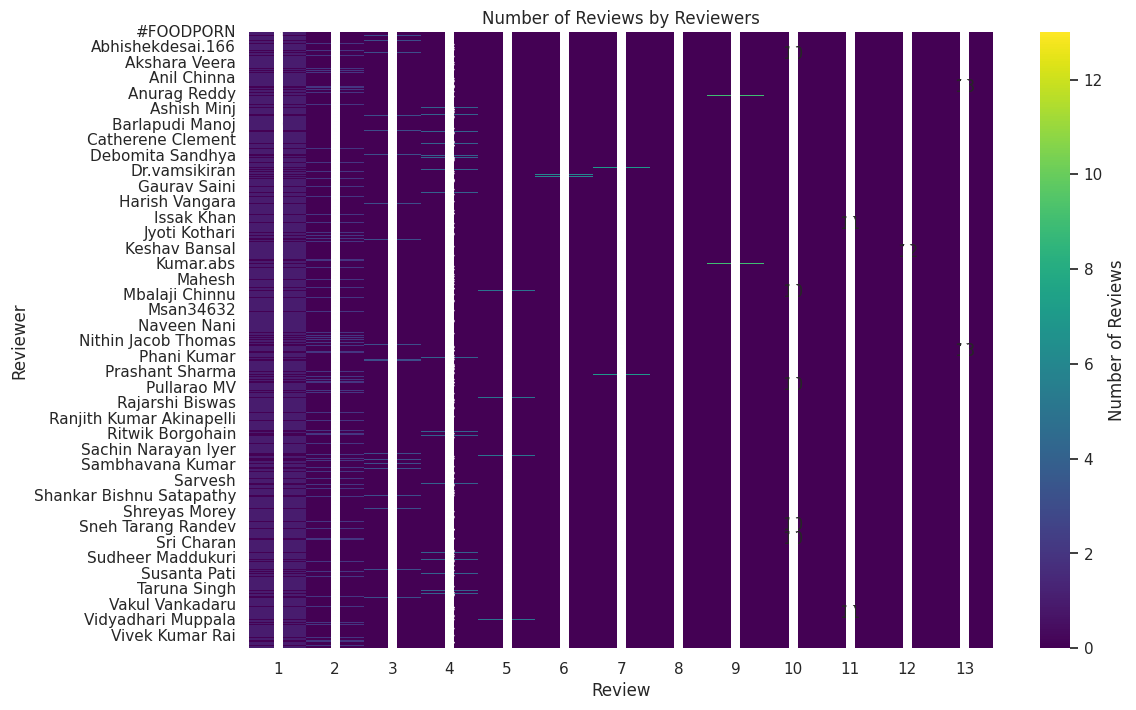

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

processed_df2 = processed_df.copy()

reviewer_counts = processed_df2.groupby('Reviewer')['Review'].count().reset_index()

heatmap_data = reviewer_counts.pivot(index='Reviewer', columns='Review', values='Review').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Reviews'})
plt.title('Number of Reviews by Reviewers')
plt.xlabel('Review')
plt.ylabel('Reviewer')
plt.show()

In [47]:
def preprocess_dataframe1(df1, text_column='Review', stopwords=set(), lemmatizer=WordNetLemmatizer()):
    df_copy = df1.copy()

    def preprocess(text):

        text = text.lower()
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        text = text.replace("-", " ").replace("'s", "").replace("'", "")
        text = ''.join(char if char in string.ascii_letters + string.digits + ' ' else ' ' for char in text)

        word_list = word_tokenize(text)
        result = [str(lemmatizer.lemmatize(word)) for word in word_list if str(lemmatizer.lemmatize(word)) not in stopwords]

        return result

    df_copy['Tokenized Review'] = df_copy[text_column].apply(preprocess)

    return df_copy

processed_df3 = preprocess_dataframe1(df1)
processed_df3.head()
processed_df4 = processed_df3.copy()

In [48]:
pip install textblob

In [49]:
from textblob import TextBlob

Another prospect that we are adding is the polarity score to the reviews so that it becomes visible and easier for us to classify a review as fake or not.

In [50]:
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


processed_df4['Polarity Review'] = processed_df4['Review'].apply(get_polarity)

processed_df4.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Tokenized Review', 'Polarity Review'],
      dtype='object')

Initially, the we select two features, 'Polarity Review' and 'Rating,' from the processed dataset. These features, representing sentiment polarity and review ratings, respectively, are essential in understanding the content and sentiment of the reviews.

The process starts by standardizing these selected numeric features to bring them onto a common scale using StandardScaler. This step ensures that both features contribute equally to the analysis, avoiding any potential bias due to differing scales.

The next phase involves using KMeans, an unsupervised learning algorithm, to create clusters based on the standardized features. In this scenario, it groups reviewers into a specified number of clusters (in this case, two clusters). The grouping relies on similarity in the 'Polarity Review' and 'Rating' features. Each reviewer gets assigned to a cluster based on the proximity of their feature values to the cluster centroids.

The scatter plot generated using Seaborn visualizes these clusters in a 2D space, with 'Polarity Review' on the x-axis and 'Rating' on the y-axis. The plot's data points are color-coded to represent the different clusters obtained from the KMeans algorithm. This visualization assists in recognizing patterns or separations among the reviewers, potentially indicating clusters of reviewers exhibiting similar review patterns. These clusters can potentially highlight anomalous behavior or discrepancies among reviewers, suggesting possible fake or biased reviews.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


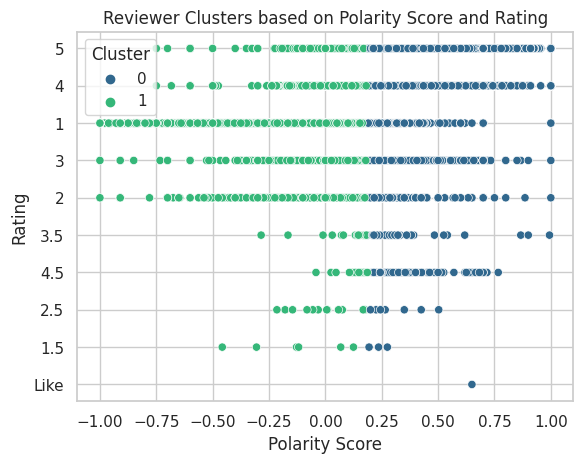

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = processed_df4[['Polarity Review', 'Rating']]

scaler = StandardScaler()
numeric_features = processed_df4[['Polarity Review', 'Rating']]

non_numeric_columns = numeric_features.select_dtypes(exclude=['float64', 'int64']).columns

numeric_features = numeric_features.drop(columns=non_numeric_columns)


features_standardized = scaler.fit_transform(numeric_features)


n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
processed_df4['Cluster'] = kmeans.fit_predict(features_standardized)

sns.scatterplot(x='Polarity Review', y='Rating', hue='Cluster', data=processed_df4, palette='viridis')
plt.title('Reviewer Clusters based on Polarity Score and Rating')
plt.xlabel('Polarity Score')
plt.ylabel('Rating')
plt.show()

**Conclusion:**
Throughout the project, we extensively explored various factors to detect fake reviews effectively. Our focus primarily revolved around features like timestamp, review text, reviewer name, restaurant name, and review ratings. By employing machine learning models such as Random Forest, KMeans clustering, and others, we achieved commendable accuracy rates. However, during our analysis, it became apparent that additional factors like user behavior and sentiments play a crucial role in enhancing the precision and accuracy of our models.

While the obtained results were promising, we acknowledge the necessity of further enriching the model by incorporating user behavior patterns, sentiment analysis of reviews, and possibly other contextual factors. Integrating sentiment analysis into the models could provide deeper insights into the reviewers' emotions and opinions, potentially distinguishing genuine reviews from fake ones more accurately. Therefore, to develop a more precise and comprehensive model, we propose expanding our feature set to include these vital aspects, thereby enhancing the model's efficacy in identifying fake reviews within the dataset.